In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [226]:
cwd = os.getcwd()
directory = cwd + "/outputs/"
analysis_path = directory + 'analysis.csv'

# new dataframe created to system model analysis
analysis_df = pd.DataFrame(columns=['model_info', 'corpus_size', '#correct_labels', '#questions_answered_no_guess', 'accuracy_model'])


# initialize appendable analysis.csv file
def initialize_file():
    if(os.path.exists(analysis_path) and os.path.isfile(analysis_path)):
        os.remove(analysis_path)
        print("analysis.csv file initialized")


# read all result csv files from outputs folder
def read_csv():
    available_models = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            df = pd.read_csv(directory + filename)
            available_models[filename] = df
            continue
        else:
            continue
    return available_models


# create new analysis dataframe
def analysis(model, model_path):
    vocab_size = len(model)     # size of the vocabulary(corpus) in model
    num_labels_dict = model["label"].value_counts()    # returns dictionary with frequency elements in all labels
    num_correct_labels = num_labels_dict["correct"]         # number of all elements with correct label
    V = num_labels_dict["correct"] + num_labels_dict["wrong"]   # number of all elements with no guess label
    accuracy_model_val = num_correct_labels / V             # accuracy model value (C/V)
    
    model_name = model_path.strip("-details.csv")
    name = model_name.rsplit('-', 1)[0]
    embedding_size = model_name.rsplit('-', 1)[1]
    model_info = name + "-" + str(embedding_size)
    
    # append all the data (model_name, corpus_size, #correct_labels, #questions_answered_no_guess, accuracy_model) 
    # to new dataframe
    analysis_df.loc[0] = [model_info, vocab_size, num_correct_labels, V, accuracy_model_val]
    
    return analysis_df


# save dataframe to analysis.csv file
def save(analysis_df, model_name):
    # save model analysis to -analysis.csv
    if os.path.exists(analysis_path):
        analysis_df.to_csv(analysis_path, mode='a', header=False, index=False)
        print(model_name + " info successfully stored in analysis.csv")
    else:
        analysis_df.to_csv(analysis_path, mode='w', header=True, index=False)


def make_dir():
    cwd = os.getcwd()
    directory = cwd + "/graphs/"

    # Create target Directory
    try:
        os.mkdir(directory)
        print("Output Directory Created ")
    except FileExistsError:
        print("Output Directory already exists")
        
    print("Files will be stored in directory: " + directory)   
    
    return directory


def plot():
    left = []                           # x-coordinates of left sides of bars
    height = []      # heights of bars
    tick_label = []                     # labels for bars
    
    df = pd.read_csv(analysis_path)
    for index, row in df.iterrows():
        left.append(index+1)
        tick_label.append(row['model_info'])
        height.append(row['accuracy_model'] * 100)
        plt.text(x=index+0.7, y=row['accuracy_model'] , s="{:.2f}%".format(row['accuracy_model']*100))
    
    plt.bar(left, height, tick_label = tick_label,
            width = 0.6, color = ['green'])  # plotting a bar chart
    
    plt.xlabel('models')                    # naming the x-axis
    plt.ylabel('accuracy score')            # naming the y-axis   
    plt.title('Model Accuracy Comparison')  # plot title 
    
    plt.show()                              # function to show the plot
    
    # create directory to save the graph
    directory = make_dir()
    plt.savefig(directory + 'model_accuracy_comparison')                  # save the plot

In [227]:
def main():
    
    # initialize appendable analysis.csv file (delete all data from last session)
    initialize_file()
    
    # read all result csv files returned from executing models
    available_models = read_csv()
    
    # create new analysis dataframe for each models and save to csv file
    for model_name, model in available_models.items():
        analysis_df = analysis(model, model_name)
        save(analysis_df, model_name)
    
    # plot the graph
    plot()

analysis.csv file initialized
glove-twitter-25-details.csv info successfully stored in analysis.csv
glove-twitter-50-details.csv info successfully stored in analysis.csv
glove-wiki-gigaword-200-details.csv info successfully stored in analysis.csv
word2vec-google-news-300-details.csv info successfully stored in analysis.csv


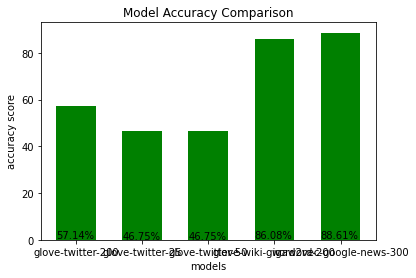

Output Directory already exists
Files will be stored in directory: c:\Users\rhina\OneDrive\Documents\GitHub\COMP472-Fall2021-A3/graphs/


<Figure size 432x288 with 0 Axes>

In [228]:
if __name__ == "__main__":
    main()